In [1]:
import csv
import pandas as pd
import numpy as np
import string
import re
import nltk

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Data
data = pd.read_csv('E:\Program\M\Code\Program\Stemmer_2\FInal\Data Final\Data_5_Lex_sen\Lex_Indihome.csv', sep=(','))
data.head(5)

,Unnamed: 0,Unnamed: 0.1,Tanggal,User ID,Data Teks,Data Teks_CaseFolding,Data Teks_clean_alay,Data Teks_Token,Data Teks_Stopword,Data Teks_Stemming,jumlah_polarity,sentimen
0,60864,60864,2021-10-02 23:53:57+00:00,IndiHomeCare,"@risyeap Halo, Kak Risye. Perihal akses jaring...",halo kak risye perihal akses jaringan nomor la...,halo kak risye perihal akses jaringan nomor la...,"['halo', 'kak', 'risye', 'perihal', 'akses', '...","['halo', 'risye', 'perihal', 'akses', 'jaringa...",halo risye perihal akses jaringan nomor layana...,-1,negatif
1,9119,9119,2021-10-11 05:18:19+00:00,inahdreh,@IndiHome @IndiHomeCare ini sinyal yg bener aj...,ini sinyal bener aja dong setand harga sama ka...,ini sinyal benar saja dong setand harga sama s...,"['ini', 'sinyal', 'benar', 'saja', 'dong', 'se...","['sinyal', 'setand', 'harga', 'burik', 'malesin']",sinyal setand harga burik malesin,0,netral
2,5276,5276,2021-10-20 16:17:21+00:00,AbiBKurniawan14,@TelkomIndonesia Tulis21Juli2021-21Juli2029A'u...,tulisjuli julia udzubillahiminassyaithannirraj...,tulisjuli julia udzubillahiminassyaithannirraj...,"['tulisjuli', 'julia', 'udzubillahiminassyaith...","['tulisjuli', 'julia', 'udzubillahiminassyaith...",tulisjuli julia udzubillahiminassyaithannirraj...,0,netral
3,33514,33514,2021-10-18 06:07:04+00:00,raemdani,"@IndiHomeCare cek DM min, ada surat cinta",cek min ada surat cinta,cek admin ada surat cinta,"['cek', 'admin', 'ada', 'surat', 'cinta']","['cek', 'admin', 'surat', 'cinta']",cek admin surat cinta,1,positif
4,20121,20121,2021-10-23 02:27:51+00:00,IndiHomeCare,"@esjeruklimo Hai, Sobat. Biar bisa dicek kondi...",hai sobat biar bisa dicek kondisi jaringannya ...,hai sobat biar bisa dicek kondisi jaringannya ...,"['hai', 'sobat', 'biar', 'bisa', 'dicek', 'kon...","['hai', 'sobat', 'dicek', 'kondisi', 'jaringan...",hai sobat dicek kondisi jaringannya informasik...,1,positif


In [3]:
top_N = 20
a = data['Data Teks_Stemming'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Kata', 'Banyak'])
print(rslt)

                   Kata  Banyak
0                 nomor    3869
1                terima    3579
2                 kasih    3496
3                   cek    2772
4              internet    2738
5              silahkan    2214
6                  halo    2142
7          informasikan    2010
8                   hai    1922
9              indihome    1702
10                bantu    1567
11                  via    1554
12                admin    1516
13             jaringan    1355
14              dibantu    1318
15                kakak    1291
16                mohon    1195
17                sobat    1151
18              layanan    1140
19  semangatdigitalmuda    1127


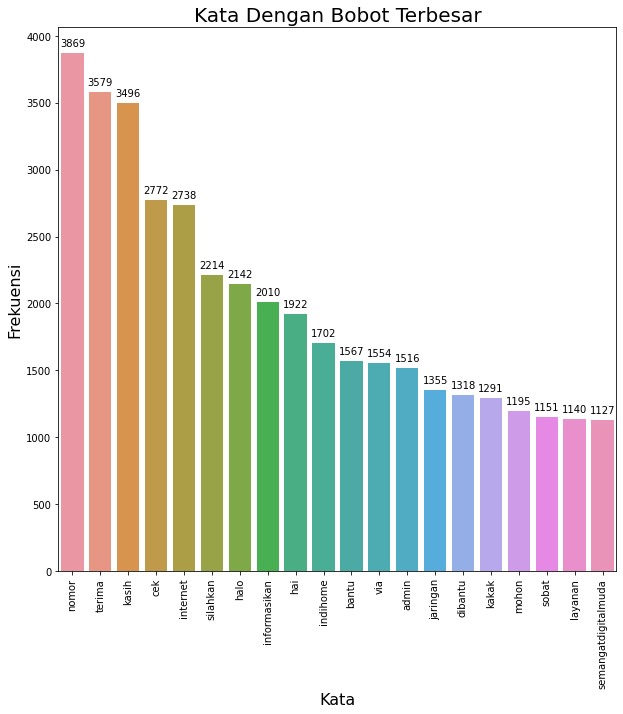

In [4]:
# Plotting Barplot
plt.figure(figsize = (10,10))
sns.barplot(x = rslt['Kata'],y = rslt['Banyak'])
for i, v in enumerate(rslt['Banyak'].tolist()):
    plt.text(i-len(str(v))/10-.05, v + 50, str(v),fontsize=10)
plt.title('Kata Dengan Bobot Terbesar',fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Kata',fontsize=16)
plt.ylabel('Frekuensi',fontsize=16)
plt.show()

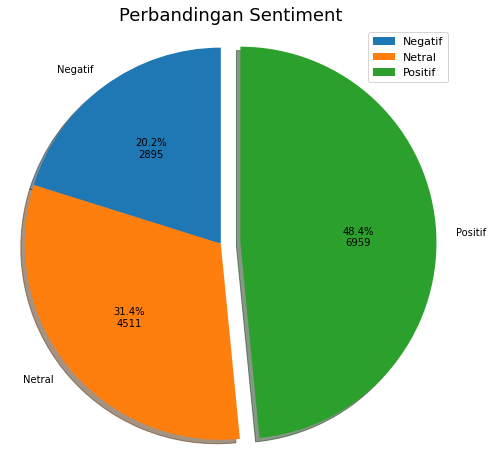

In [5]:
# Plotting Pie
def pct_pie(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d}".format(pct, absolute)

sentimen = data['Data Teks_Stopword'].groupby(data['sentimen']).count().values

plt.figure(figsize = (8,8))
plt.pie(sentimen, explode=(0,0,0.1), labels=['Negatif', 'Netral','Positif'], shadow=True,
        autopct=lambda pct: pct_pie(pct, sentimen),startangle=90)
plt.title('Perbandingan Sentiment',fontsize=18)
plt.axis('equal')
plt.legend(fontsize=11)
plt.show()

In [6]:
# Melihat banyak Tweet perhari berdasarkan sentiment
data['Tanggal'] = pd.to_datetime(data['Tanggal'])
tph = data['Data Teks_Stopword'].groupby([data['Tanggal'].dt.date, data['sentimen']]).count()
frek = tph.values

# To Data Frame
tanggal = [ i for i, j in tph.index.tolist() ]
senti = [ j for i, j in tph.index.tolist() ]
sent = pd.DataFrame({'Tanggal':tanggal,'sentiment':senti, 'Frekuensi':frek})

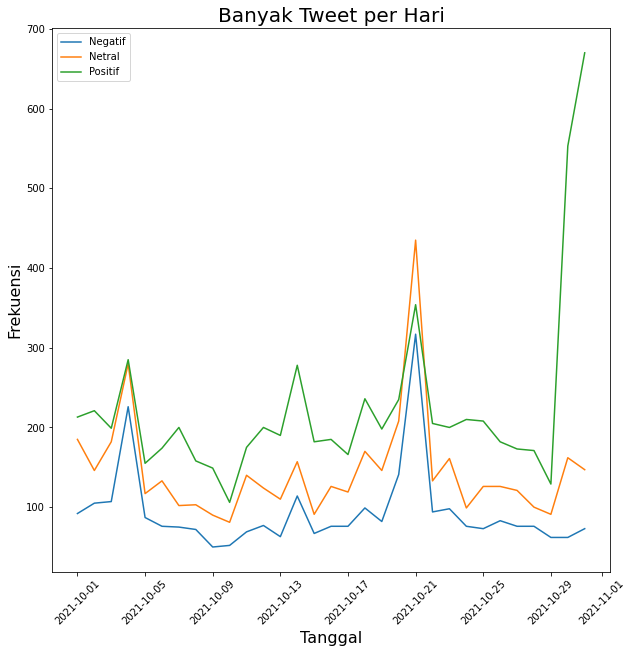

In [7]:
# Plotting line
plt.figure(figsize = (10,10))
sns.lineplot(x='Tanggal',y='Frekuensi',hue='sentiment',data=sent)
plt.title('Banyak Tweet per Hari',fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Tanggal',fontsize=16)
plt.ylabel('Frekuensi',fontsize=16)
plt.legend(['Negatif','Netral','Positif'])
plt.show()